# Proyecto práctico

## Configuracion inicial


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

## Importar datos

In [32]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df1 = pd.concat([df.head(), df.tail()])
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


## Analizando los datos

(1338, 7)


<Axes: >

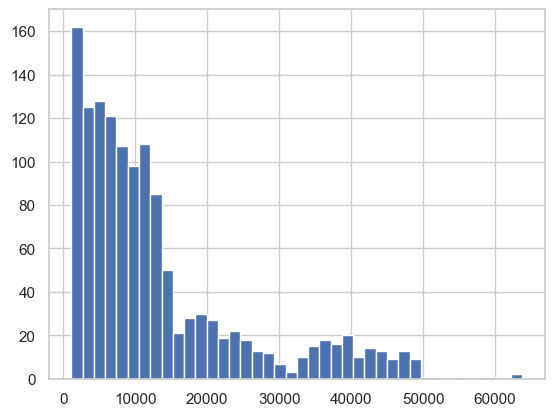

In [18]:
print(df.shape)
df.charges.hist(bins =40)

In [19]:
from scipy import stats

z = np.abs(stats.zscore(df.charges))
df[z>3]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [34]:
dfo = df[z<3]
dfo

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Análisis de correlación de los datos

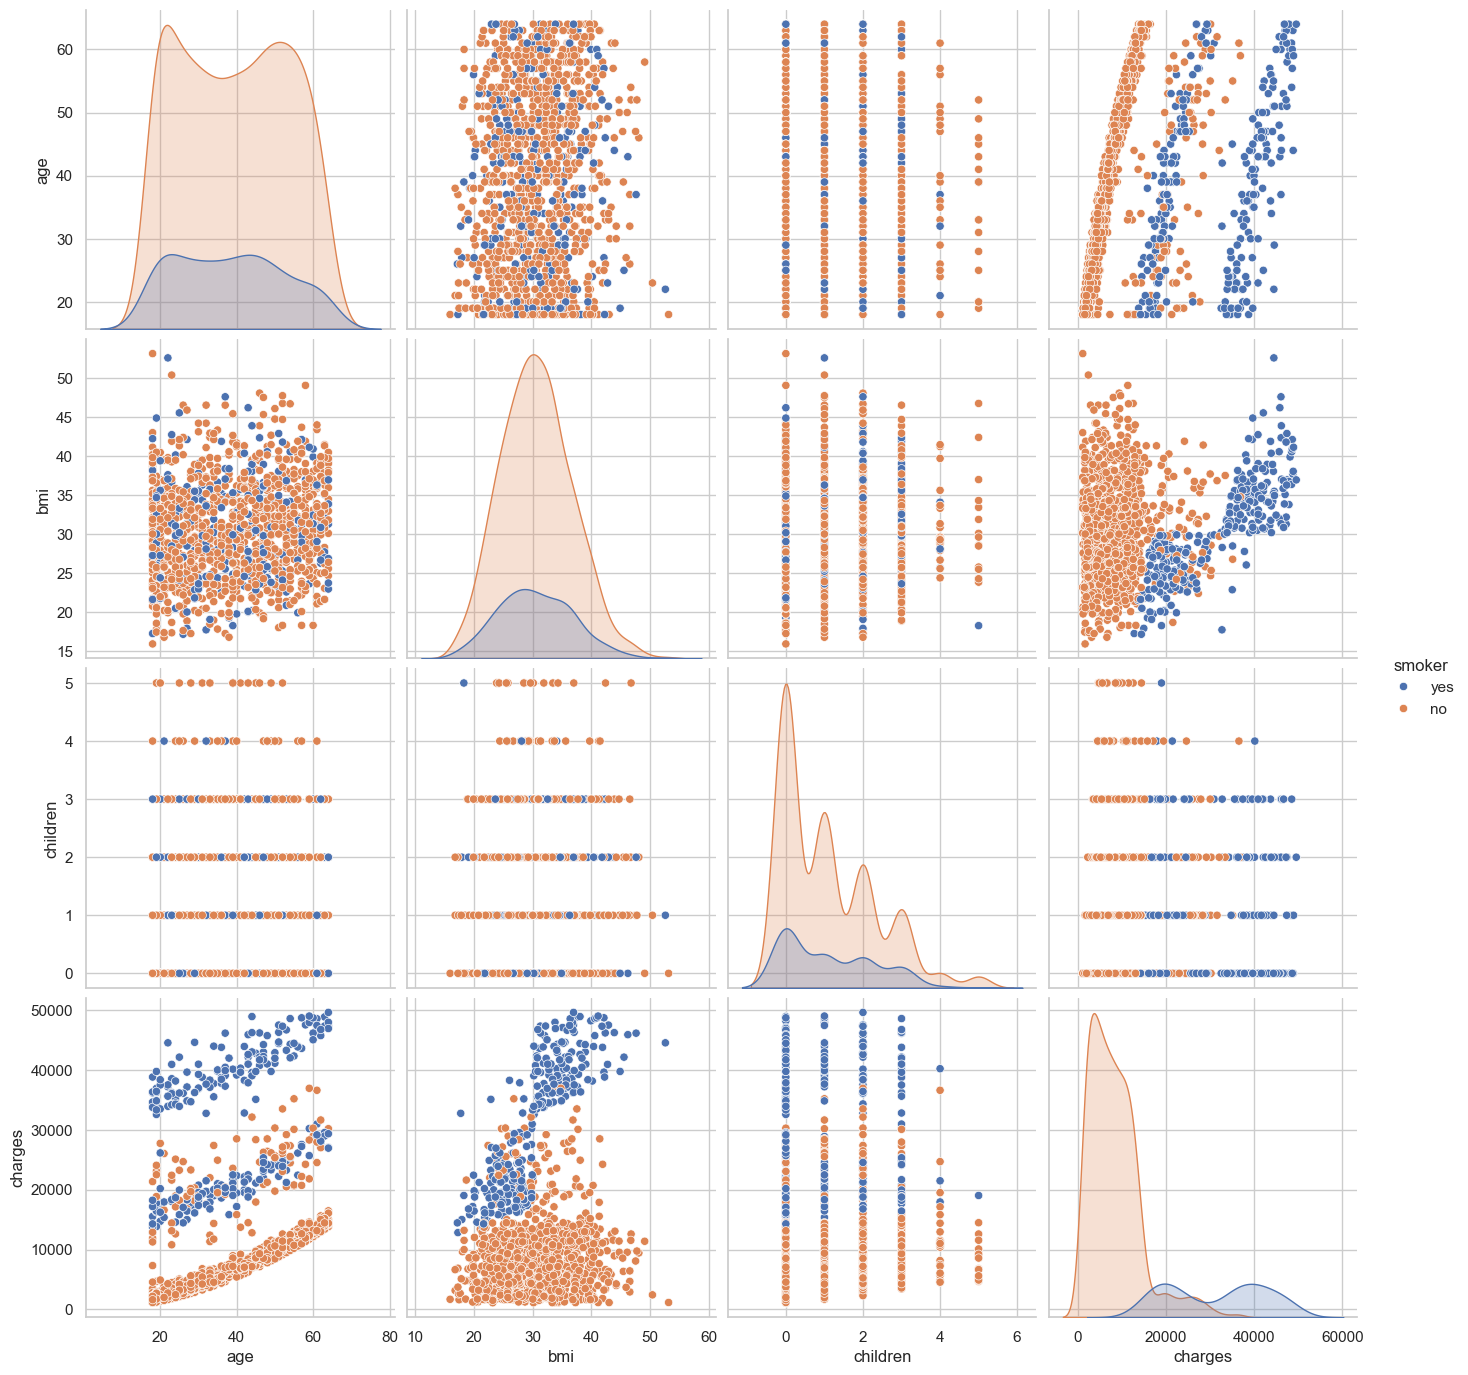

In [44]:
sns.pairplot(dfo, hue='smoker', height=3.5);


(1338, 7)

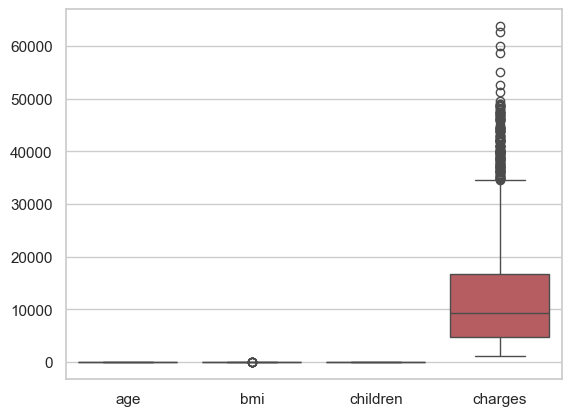

In [39]:
sns.boxplot(df)
df.shape

(1331, 7)

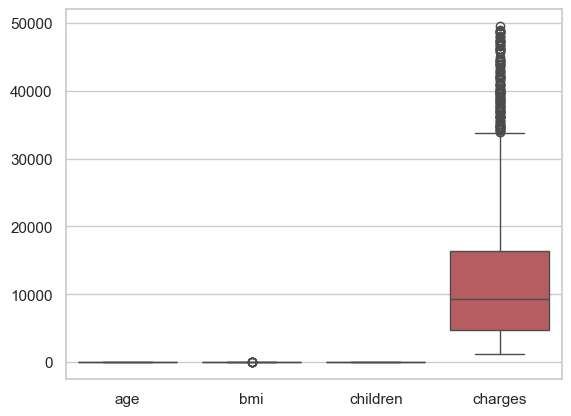

In [40]:
sns.boxplot(dfo)
dfo.shape

## Análisis numérico

In [45]:
dfo

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


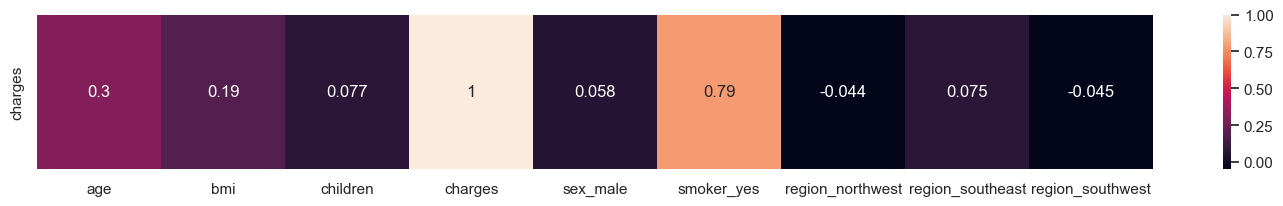

In [42]:
plt.figure(figsize=(18,2))
sns.heatmap(df_dummy_corr.iloc[3:4,:],annot=True);

# Entrenamiento del modelo

## Creando modelos

from sklearn.preprocessing import StandardScaler     # se utilizará para estandarizar los datos numéricos y la librería 
from sklearn.linear_model import LinearRegression    # para crear el modelo de regresión lineal. Además, se importa la librería 
from sklearn.model_selection import train_test_split # para dividir los datos en conjuntos de entrenamiento y prueba.

In [46]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = list(set(df_dummy.columns)-set(['charges']))

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_dummy[X_cols].values
y = df_dummy[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

In [47]:
y_pred.shape

(333, 1)

# Evaluando el modelo

## Funciones de metricas


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.3584
MSE: 0.2631
R^2: 0.764


## Insight

In [76]:
from regressors import stats
from scipy.stats import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

ModuleNotFoundError: No module named 'regressors'

In [77]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================


AttributeError: module 'scipy.stats' has no attribute 'summary'

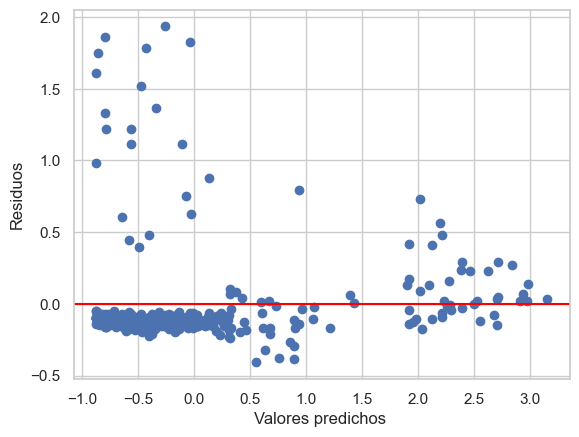

In [78]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

## Segundo modelo


In [79]:
df_second = df_dummy.copy(deep=True)
df_second['age2'] = df_second.age ** 2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso_fumador'] = df_second.sobrepeso * df_second.smoker_yes

<Axes: >

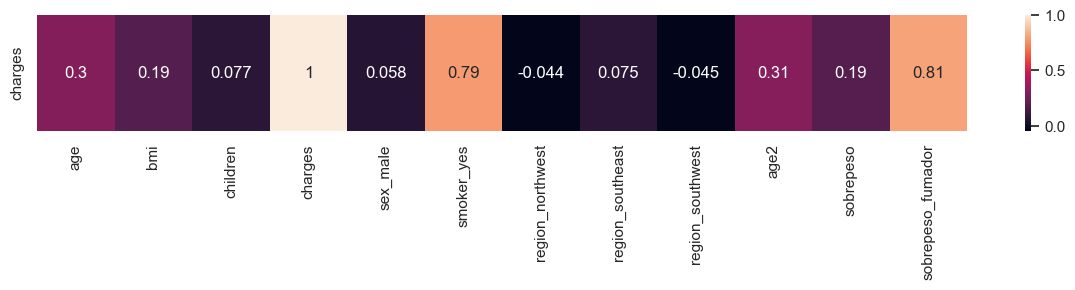

In [80]:
plt.figure(figsize=(15,1.5))
sns.heatmap(df_second.corr().iloc[3:4,:],annot=True)

In [81]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = list(set(df_second.columns)-set(['charges']))

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

In [82]:
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.1986
MSE: 0.126
R^2: 0.887


In [83]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [84]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================


AttributeError: module 'scipy.stats' has no attribute 'summary'

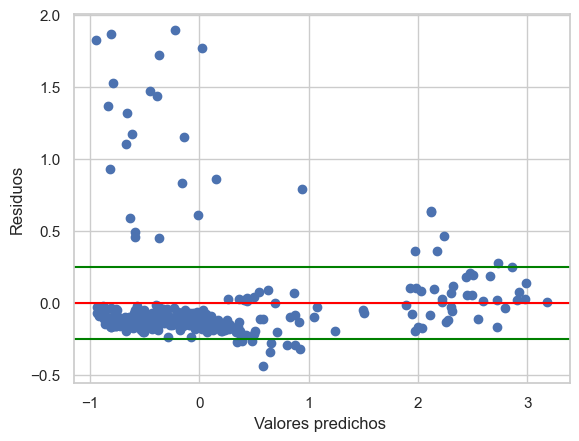

In [85]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

# Tercer modelo


In [86]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = ['sobrepeso_fumador','smoker_yes','children','age2']

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

In [87]:
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.1981
MSE: 0.1265
R^2: 0.8865


In [88]:
# model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [89]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================


AttributeError: module 'scipy.stats' has no attribute 'summary'

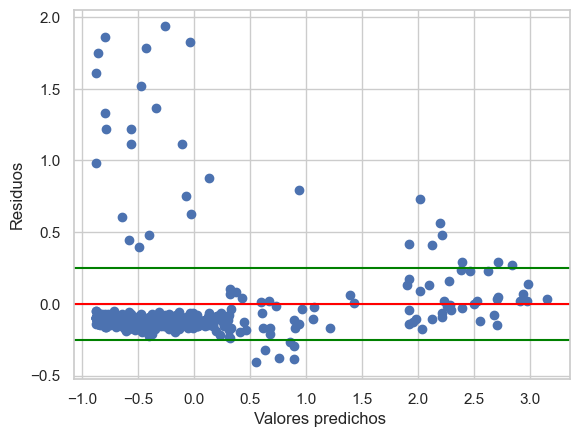

In [90]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();